# Import libs

In [1]:
from src.DataWrangle import FetchData
from src.BaseClasses import ConfigFile as CF, Helper as H

from src.Plot import Delta, PlotHelper as PH
from src.Plot import Hazard, Hazard_Wrapper as HW
from src.Plot import RateNumErr

import pandas as pd
import matplotlib.pyplot as plt

from imp import reload
reload(FetchData); reload(CF); reload(H);
reload(PH); reload(HW); reload(Hazard);  reload(Delta)
reload(RateNumErr)

<module 'src.Plot.RateNumErr' from '/mnt/c/software/seet2020/src/Plot/RateNumErr.py'>

# Load data

In [3]:
feeds = pd.read_csv(CF.fname_feedback, encoding = "ISO-8859-1")
df_pair = pd.read_csv(CF.fname_pair, encoding = "ISO-8859-1")
df_occur = pd.read_csv(CF.fname_occur, encoding = "ISO-8859-1")

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#Plot params
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 10})
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

# Plots: Survival Curves for #Attempts

In [45]:
errSets=['3;', '5; 6;', '5;', '7;']
dfs = HW.getDF_dict(df_pair, errSets=errSets)
maxX = 5

## Across Events

key=all, TName=numAttempt, groupBy=tool, splitBy=event
	Survival
		['labs', 'exam']


/mnt/c/software/seet2020/src/Plot/Hazard.py:159: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


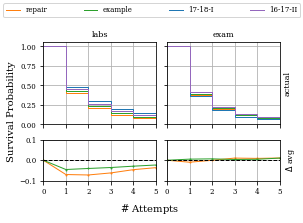

In [46]:
params = {'fpath':CF.path_hazard, 'fname':'Survival Attempts Delta',
          'xlim':maxX, 'width':4, 'height':3, 
          'nrows':2, 'ncols':2, 'height_ratios':[2,1],
          'wspace':0.1, 'hspace':0.25, 'revSortSplit':True,
          'top':0.75, 'left':0.08, 'bot':0.2, 'xlabelpad':6, 'ylabelpad':1,
           'splitKeys':['labs', 'exam']}
fig, gs, kmfs = HW.plot_indiv(dfs, key='all',  Tname='numAttempt', groupBy='tool', splitBy='event', params=params)

params = {'fpath':CF.path_hazard, 'fname':'Survival Attempts Delta',
          'minX':0, 'maxX':maxX, 'minY':-0.1, 'maxY':0.1,
          'freq':1, 'newFig':False, 'ncols':2, 
          'showXTicks':[3,4], 'showYTicks':[1,3],
          'xlabels':['', '', '', ''],
          'ylabels':['', 'actual', '', r'$\Delta$ avg'],
          'xsuplabel':r'$\#$ Attempts', 'xsuppad': 0.05,
          'ysuplabel':'Survival Probability', 'ysuppad':0.02,
          'left':0.13, 'right':0.95,
          'bottom':0.18, 'top':0.82,
          'kmfs':kmfs
         }
fig = Delta.delta(fig, gs, params)

## Across Individual Labs

key=labs_1-6, TName=numAttempt, groupBy=tool, splitBy=labs
	Survival
		['LAB-01', 'LAB-02', 'LAB-03', 'LAB-04', 'LAB-05', 'LAB-06', 'LAB-07']


/mnt/c/software/seet2020/src/Plot/Hazard.py:159: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


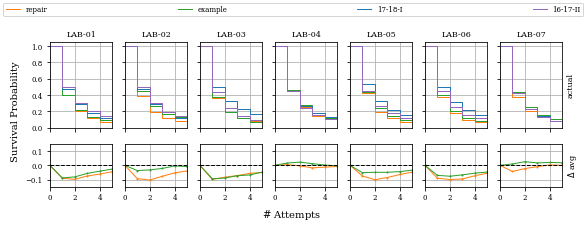

In [48]:
params = {'fpath':CF.path_hazard, 'fname':'Survival Attempts Lab Delta',
          'xlim':maxX, 'width':8, 'height':3, 
          'nrows':2, 'ncols':7, 'height_ratios':[2,1],
          'wspace':0.2, 'hspace':0.25,
          'top':0.75, 'left':0.08, 'bot':0.2, 'xlabelpad':6, 'ylabelpad':1,
         'splitKeys':['LAB-01', 'LAB-02', 'LAB-03', 'LAB-04', 'LAB-05', 'LAB-06', 'LAB-07']}
fig, gs, kmfs = HW.plot_indiv(dfs, key='labs_1-6', Tname='numAttempt', groupBy='tool', splitBy='labs', params=params)

params = {'fpath':CF.path_hazard, 'fname':'Survival Attempts Lab Delta',
          'minX':0, 'maxX':maxX, 'minY':-0.15, 'maxY':0.15,
          'freq':1, 'newFig':False, 'ncols':7, 
          'showXTicks':range(8,15), 'showYTicks':[1,8],
          'ylabels':['']*6 + ['actual'] + ['']*6 + [r'$\Delta$ avg'],
          'xsuplabel':r'$\#$ Attempts', 'xsuppad': 0.02,
          'ysuplabel':'Survival Probability', 'ysuppad':0.02,
          'left':0.08, 'right':0.97,
          'bottom':0.15, 'top':0.82,
          'kmfs':kmfs
         }
fig = Delta.delta(fig, gs, params)

## Across Selected Errors

key=chosen-errs labs_1-6, TName=numAttempt, groupBy=tool, splitBy=errSet
	Survival
		['3;', '5; 6;', '5;', '7;']


/mnt/c/software/seet2020/src/Plot/Hazard.py:159: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


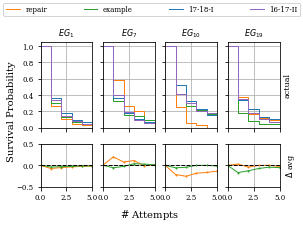

In [49]:
params = {'fpath':CF.path_hazard, 'fname':'Survival Attempts Errors Delta',
          'xlim':maxX, 'width':4, 'height':3, 
          'nrows':2, 'ncols':4, 'height_ratios':[2,1],
          'wspace':0.2, 'hspace':0.25,
          'top':0.75, 'left':0.08, 'bot':0.2, 'xlabelpad':6, 'ylabelpad':1,
          'splitKeys':errSets,
          'replaceSplit':[r'$EG_{1}$', r'$EG_{7}$', r'$EG_{10}$', r'$EG_{19}$']}
fig, gs, kmfs = HW.plot_indiv(dfs, key='chosen-errs labs_1-6', Tname='numAttempt', groupBy='tool', splitBy='errSet', params=params)

params = {'fpath':CF.path_hazard, 'fname':'Survival Attempts Errors Delta',
          'minX':0, 'maxX':maxX, 'minY':-0.5, 'maxY':0.5,
          'freq':1, 'newFig':False, 'ncols':4, 
          'showXTicks':range(5, 9), 'showYTicks':[1,5],
          'ylabels':['']*3 + ['actual'] + ['']*3 + [r'$\Delta$ avg'],
          'xsuplabel':r'$\#$ Attempts', 'xsuppad': 0.02,
          'ysuplabel':'Survival Probability', 'ysuppad':0.02,
          'left':0.12, 'right':0.95,
          'bottom':0.15, 'top':0.82,
          'kmfs':kmfs
         }

fig = Delta.delta(fig, gs, params)

# Plots: Survival Curves for TimeTaken

In [5]:
errSets=['3;', '5; 6;', '5;', '7;']
dfs = HW.getDF_dict(df_pair, errSets=errSets)
maxX = 200

## Across Events

key=all, TName=timeTaken (sec), groupBy=tool, splitBy=event
	Survival
		['labs', 'exam']


/mnt/c/software/seet2020/src/Plot/Hazard.py:159: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


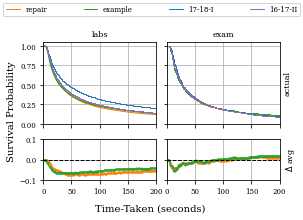

In [6]:
params = {'fpath':CF.path_hazard, 'fname':'Survival Time Delta',
          'xlim':maxX, 'width':4, 'height':3, 
          'nrows':2, 'ncols':2, 'height_ratios':[2,1],
          'wspace':0.1, 'hspace':0.25, 'revSortSplit':True,
          'top':0.75, 'left':0.08, 'bot':0.2, 'xlabelpad':6, 'ylabelpad':1}
fig, gs, kmfs = HW.plot_indiv(dfs, key='all',  Tname='timeTaken (sec)', groupBy='tool', splitBy='event', params=params)

params = {'fpath':CF.path_hazard, 'fname':'Survival Time Delta',
          'minX':0, 'maxX':maxX, 'minY':-0.1, 'maxY':0.1,
          'freq':1, 'newFig':False, 'ncols':2, 
          'showXTicks':[3,4], 'showYTicks':[1,3],
          'xlabels':['']*4,
          'ylabels':['', 'actual', '', r'$\Delta$ avg'],
          'xsuplabel':r'Time-Taken (seconds)', 'xsuppad': 0.05,
          'ysuplabel':'Survival Probability', 'ysuppad':0.02,
          'left':0.13, 'right':0.95,
          'bottom':0.18, 'top':0.82,
          'kmfs':kmfs
         }
fig = Delta.delta(fig, gs, params)

## Across Individual Labs

key=labs_1-6, TName=timeTaken (sec), groupBy=tool, splitBy=labs
	Survival
		['LAB-01', 'LAB-02', 'LAB-03', 'LAB-04', 'LAB-05', 'LAB-06', 'LAB-07']


/mnt/c/software/seet2020/src/Plot/Hazard.py:159: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


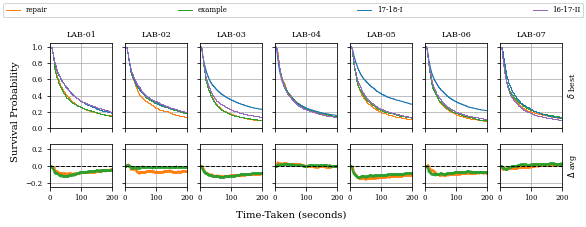

In [53]:
params = {'fpath':CF.path_hazard, 'fname':'Survival Time Lab Delta',
          'xlim':maxX, 'width':8, 'height':3, 
          'nrows':2, 'ncols':7, 'height_ratios':[2,1],
          'wspace':0.2, 'hspace':0.25,
          'top':0.75, 'left':0.08, 'bot':0.2, 'xlabelpad':6, 'ylabelpad':1,
         'splitKeys':['LAB-01', 'LAB-02', 'LAB-03', 'LAB-04', 'LAB-05', 'LAB-06', 'LAB-07']}
fig, gs, kmfs = HW.plot_indiv(dfs, key='labs_1-6', Tname='timeTaken (sec)', groupBy='tool', splitBy='labs', params=params)

params = {'fpath':CF.path_hazard, 'fname':'Survival Time Lab Delta',
          'minX':0, 'maxX':maxX, 'minY':-0.25, 'maxY':0.25,
          'freq':1, 'newFig':False, 'ncols':7, 
          'showXTicks':range(8,15), 'showYTicks':[1,8],
          'ylabels':['']*6 + [r'$\delta$ best'] + ['']*6 + [r'$\Delta$ avg'],
          'xsuplabel':r'Time-Taken (seconds)', 'xsuppad': 0.02,
          'ysuplabel':'Survival Probability', 'ysuppad':0.02,
          'left':0.08, 'right':0.97,
          'bottom':0.15, 'top':0.82,
          'kmfs':kmfs
         }
fig = Delta.delta(fig, gs, params)

## Across Selected Errors

key=chosen-errs labs_1-6, TName=timeTaken (sec), groupBy=tool, splitBy=errSet
	Survival
		['3;', '5; 6;', '5;', '7;']


/mnt/c/software/seet2020/src/Plot/Hazard.py:159: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


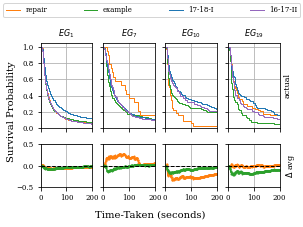

In [54]:
params = {'fpath':CF.path_hazard, 'fname':'Survival Time Errors Delta',
          'xlim':maxX, 'width':4, 'height':3, 
          'nrows':2, 'ncols':4, 'height_ratios':[2,1],
          'wspace':0.2, 'hspace':0.25,
          'top':0.75, 'left':0.08, 'bot':0.2, 'xlabelpad':6, 'ylabelpad':1,
          'splitKeys':errSets,
          'replaceSplit':[r'$EG_{1}$', r'$EG_{7}$', r'$EG_{10}$', r'$EG_{19}$']
         }
fig, gs, kmfs = HW.plot_indiv(dfs, key='chosen-errs labs_1-6', Tname='timeTaken (sec)', groupBy='tool', splitBy='errSet', params=params)

params = {'fpath':CF.path_hazard, 'fname':'Survival Time Errors Delta',
          'minX':0, 'maxX':maxX, 'minY':-0.5, 'maxY':0.5,
          'freq':1, 'newFig':False, 'ncols':4, 
          'showXTicks':range(5, 9), 'showYTicks':[1,5],
          'ylabels':['']*3 + ['actual'] + ['']*3 + [r'$\Delta$ avg'],
          'xsuplabel':r'Time-Taken (seconds)', 'xsuppad': 0.02,
          'ysuplabel':'Survival Probability', 'ysuppad':0.02,
          'left':0.12, 'right':0.95,
          'bottom':0.15, 'top':0.82,
          'kmfs':kmfs
         }
fig = Delta.delta(fig, gs, params)

# Plots: Rate of Change

## #Errors

In [10]:
y_err = 'numErrors'
yType_err = 'numErrors_LOC-sumWindow'
CF.rate_winSize = 30
CF.rate_winSkip = 15

df_fail_err, df_pass_err = RateNumErr.get_dfFail(df_occur) 
dict_dfNumErr_err = RateNumErr.get_dict_dfNumErr(df_fail_err, df_pass_err, y_err)

# Multiply by 100 to get per 100 LOC
dict_dfNumErr_err['ALL'][yType_err] = dict_dfNumErr_err['ALL'][yType_err]*100

Fetching df_fail and df_pass ...
Computing df_numErr(s) ...


RuntimeError: matplotlib does not support generators as input

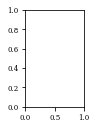

In [11]:
params = {'fpath':CF.path_rateNumErr, 'fname':'Rate numErrors',
          'y':y_err, 'yType': yType_err, 
          'width':8, 'height':3, 
          'nrows':2, 'ncols':7, 'height_ratios':[2,1],
          'minX':13.75, 'maxX':17.25,
          'wspace':0.1, 'hspace':0.25,
          'top':0.75, 'left':0.08, 'bot':0.2, 'xlabelpad':6, 'ylabelpad':1}

fig, gs, points = RateNumErr.plot_bar(dict_dfNumErr_err, params)

params = {'fpath':CF.path_rateNumErr, 'fname':'Rate numErrors',
          'minX':13.75, 'maxX':17.25, #'minY':-0.25, 'maxY':0.25,
          'freq':1, 'newFig':False, 'ncols':7, 'markersize':2,
          'showXTicks':range(8,15), 'showYTicks':[1,8],
          'titles': ['LAB-0'+str(i) for i in range(1,8)] + ['']*2*7,
          'ylabels': ['']*6 + ['actual'] + ['']*6+[r'$\Delta$ avg'],
          'xsuplabel':r'Hour', 'xsuppad': 0.05,
          'ysuplabel':r'$\#$ Errors per 100 LOC', 'ysuppad':0.02,
          'left':0.08, 'right':0.97,
          'bottom':0.15, 'top':0.85,
          'points':points, 'xticks':[14, 15, 16, 17]
         }
fig = Delta.delta(fig, gs, params)

## #Attempt

In [505]:
reload(RateNumErr)

y_attempt = 'numAttempt'
Settings.rate_winSize = 30
Settings.rate_winSkip = 15

df_fail_attempt, df_pass_attempt = RateNumErr.get_dfFail(df_pair) 
dict_dfNumErr_attempt = RateNumErr.get_dict_dfNumErr(df_fail_attempt, df_pass_attempt, y_attempt)

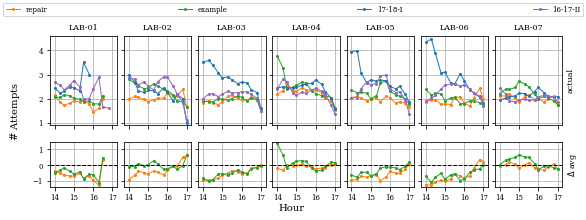

In [506]:
reload(RateNumErr); reload(PH); reload(Delta)

params = {'fpath':Settings.path_rateNumErr, 'fname':'Rate numAttempt',
          'y':y_attempt, 'yType': y_attempt, 
          'minX':13.75, 'maxX':17.25,
          'width':8, 'height':3, 
          'nrows':2, 'ncols':7, 'height_ratios':[2,1],
          'wspace':0.1, 'hspace':0.25,
          'top':0.75, 'left':0.08, 'bot':0.2, 'xlabelpad':6, 'ylabelpad':1}

fig, gs, points = RateNumErr.plot_bar(dict_dfNumErr_attempt, params)

params = {'fpath':Settings.path_rateNumErr, 'fname':'Rate numAttempt',
          'minX':13.75, 'maxX':17.25, #'minY':-0.25, 'maxY':0.25,
          'freq':1, 'newFig':False, 'ncols':7, 'markersize':2,
          'showXTicks':range(8,15), 'showYTicks':[1,8],
          'titles': ['LAB-0'+str(i) for i in range(1,8)] + ['']*2*7,
          'ylabels': ['']*6 + ['actual'] + ['']*6 + [r'$\Delta$ avg'],
          'xsuplabel':r'Hour', 'xsuppad': 0.05,
          'ysuplabel':r'$\#$ Attempts', 'ysuppad':0.02,
          'left':0.08, 'right':0.97,
          'bottom':0.15, 'top':0.85,
          'points':points, 'xticks':[14, 15, 16, 17]
         }
fig = Delta.delta(fig, gs, params)

## TimeTaken

In [507]:
reload(RateNumErr)

y_time = 'timeTaken'
Settings.rate_winSize = 30
Settings.rate_winSkip = 15

df_fail_time, df_pass_time = RateNumErr.get_dfFail(df_pair) 
dict_dfNumErr_time = RateNumErr.get_dict_dfNumErr(df_fail_time, df_pass_time, y_time)

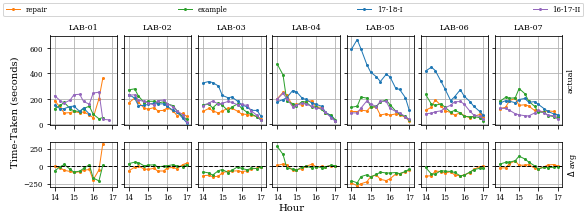

In [508]:
reload(RateNumErr); reload(PH); reload(Delta)

params = {'fpath':Settings.path_rateNumErr, 'fname':'Rate timeTaken',
          'y':y_time, 'yType': y_time, 
          'minX':13.75, 'maxX':17.25,
          'width':8, 'height':3, 
          'nrows':2, 'ncols':7, 'height_ratios':[2,1],
          'wspace':0.1, 'hspace':0.25,
          'top':0.75, 'left':0.08, 'bot':0.2, 'xlabelpad':6, 'ylabelpad':1}

fig, gs, points = RateNumErr.plot_bar(dict_dfNumErr_time, params)

params = {'fpath':Settings.path_rateNumErr, 'fname':'Rate timeTaken',
          'minX':13.75, 'maxX':17.25, #'minY':-0.25, 'maxY':0.25,
          'freq':1, 'newFig':False, 'ncols':7, 'markersize':2,
          'showXTicks':range(8,15), 'showYTicks':[1,8],
          'titles': ['LAB-0'+str(i) for i in range(1,8)] + ['']*2*7,
          'ylabels': ['']*6 + ['actual'] + ['']*6 + [r'$\Delta$ avg'],
          'xsuplabel':r'Hour', 'xsuppad': 0.05,
          'ysuplabel':r'Time-Taken (seconds)', 'ysuppad':0.02,
          'left':0.08, 'right':0.97,
          'bottom':0.15, 'top':0.85,
          'points':points, 'xticks':[14, 15, 16, 17]
         }
fig = Delta.delta(fig, gs, params)

# Errors Histogram

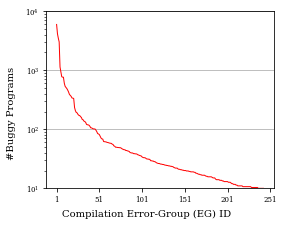

In [86]:
reload(CompErrs_hist); reload(Settings)

fpath, fname = Settings.path_compErrs, 'compilation_histogram'
fig, errs_count = CompErrs_hist.plot_hist_ces(df_occur)

params = {'fpath':fpath, 'fname':fname,
          'minY':10**1, 'maxY':10**4,
          'xsuplabel':r'Compilation Error-Group (EG) ID', 'xsuppad': 0.03,
          'ysuplabel':r'#Buggy Programs', 'ysuppad':0.03,
          'left':0.15, 'right':0.94,
          'bottom':0.15, 'top':0.97,
         }

Delta.adjust_figs(fig, None, params)
PH.savefig(fig, fpath, fname, fname)

# Debug

In [387]:
# The top err-sets ordered by counts of df_occur
errs_count[:100]

[('3;', 5964.666666666667),
 ('4;', 4156.0),
 ('1;', 3487.6666666666665),
 ('2;', 3017.6666666666665),
 ('35;', 1135.0),
 ('3; 4;', 949.33333333333337),
 ('5; 6;', 777.33333333333337),
 ('9;', 763.33333333333337),
 ('1; 4;', 761.66666666666663),
 ('5;', 603.0),
 ('10;', 533.0),
 ('11;', 511.33333333333331),
 ('1; 8; 36;', 488.66666666666669),
 ('8;', 460.0),
 ('3; 2;', 427.66666666666669),
 ('2; 4;', 389.66666666666669),
 ('15;', 376.33333333333331),
 ('1; 3;', 361.33333333333331),
 ('7;', 338.66666666666669),
 ('12;', 337.0),
 ('13;', 332.66666666666669),
 ('31;', 234.33333333333334),
 ('3; 5;', 206.0),
 ('21;', 192.66666666666666),
 ('11; 3;', 189.66666666666666),
 ('1; 2;', 178.66666666666666),
 ('34;', 172.33333333333334),
 ('8; 3;', 171.0),
 ('6;', 163.66666666666666),
 ('1; 3; 4;', 158.66666666666666),
 ('29;', 146.33333333333334),
 ('1; 2; 4;', 145.0),
 ('14;', 137.33333333333334),
 ('3; 12;', 135.33333333333334),
 ('23;', 131.0),
 ('19;', 121.0),
 ('32;', 119.33333333333333),
 

# Errors Area Under Curve

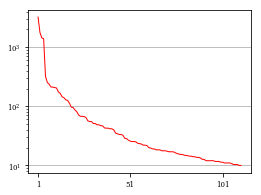

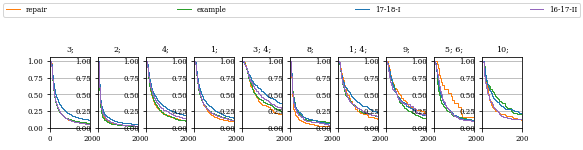

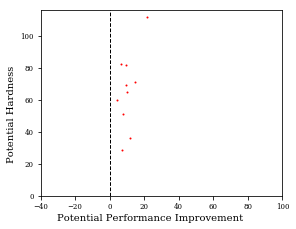

In [678]:
fig, errs_pair = CompErrs_hist.plot_hist_ces(df_pair)
fname = 'Survival Time Errors AUC'

topK = 100
fig = CompErrs_AUC.plot_auc(df_pair, errs_pair, topK)

params = {'fpath':Settings.path_compErrs, 'fname':fname,
          'minX':-40, 'minY':0, 'maxX':100, #'minY':-0.2, 'maxY':0.2,
          #'freq':1, 'newFig':False, 'ncols':9, 
          'title': 'Top-'+str(topK)+' Compiler-Errors',
          'showXTicks':[1], 'showYTicks':[1],
          #'ylabels':['AUC of Baseline Survival'], 'ylabelpos':'left',
          #'xlabels':[r'$\Delta$ AUC of Survival (Best_Feedback - Avg_Baseline)'],
          'xsuplabel':'Potential Performance Improvement', 'xsuppad': 0.02,
          'ysuplabel':'Potential Hardness', 'ysuppad':0.02,
          'left':0.12, 'right':0.96,
          'bottom':0.12, 'top':0.98,
         }  
    
#axes = fig.get_axes()
Delta.adjust_figs(fig, None, params)
PH.savefig(fig, Settings.path_compErrs, fname, fname)